In [1]:
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pylab as plt2
%matplotlib inline

In [2]:
import os
import sys
import itertools
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [4]:
import pandas as pd
from pandas import DataFrame, Series

In [3]:
pathfeatures  = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Discrete/features/"
pathlabels = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/MediaEval/annotations-org/"
pathrank = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Discrete/annotations/"

arousalfeatures = np.genfromtxt( os.path.join(pathfeatures,"ACCEDEfeaturesArousal_TAC2015.txt"), names=True, delimiter='\t', dtype=None)
valencefeatures = np.genfromtxt( os.path.join(pathfeatures,"ACCEDEfeaturesValence_TAC2015.txt"), names=True, delimiter='\t', dtype=None)

annotaccederank = np.genfromtxt(os.path.join(pathrank, "ACCEDEranking.txt.org"), names=True, delimiter='\t', dtype=None)
accedetrainsets = np.genfromtxt(os.path.join(pathrank, "ACCEDEsets.txt"), names=True, delimiter='\t', dtype=None)                               

annotaccedeaffect = np.genfromtxt(os.path.join(pathlabels, "ACCEDEaffect.txt"), names=True, delimiter='\t', dtype=None)
annotmediaaffect = np.genfromtxt(os.path.join(pathlabels, "MEDIAEVALaffect.txt"), names=True, delimiter='\t', dtype=None)

mediatrainsets = np.genfromtxt(os.path.join(pathlabels, "MEDIAEVALsets.txt"), names=True, delimiter='\t', dtype=None)


In [5]:
arousaldf = DataFrame(arousalfeatures)

In [6]:
valencedf = DataFrame(valencefeatures)

In [7]:
rankdf = DataFrame(annotaccederank)

In [8]:
tsetsdf = DataFrame(accedetrainsets)

In [9]:
len(tsetsdf[tsetsdf.set == 1])

2450

In [10]:
pathlist = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/images"
pathcontinuous = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/"
chatterArousal = np.genfromtxt( os.path.join(pathcontinuous,"Chatter_Arousal.txt"), names=True, delimiter='\t', dtype=None)
chatterValence = np.genfromtxt( os.path.join(pathcontinuous,"Chatter_Valence.txt"), names=True, delimiter='\t', dtype=None)

In [11]:
origamiArousal = np.genfromtxt( os.path.join(pathcontinuous,"Origami_Arousal.txt"), names=True, delimiter='\t', dtype=None)
origamiValence = np.genfromtxt( os.path.join(pathcontinuous,"Origami_Valence.txt"), names=True, delimiter='\t', dtype=None)

In [12]:

ardf = DataFrame(chatterArousal)
valdf = DataFrame(chatterValence)
ardf[:5]

,Time,Mean,Std
0,0,-0.135301,0.248899
1,1,-0.142815,0.261754
2,2,-0.148660,0.272467
3,3,-0.153605,0.281531
4,4,-0.157844,0.289300


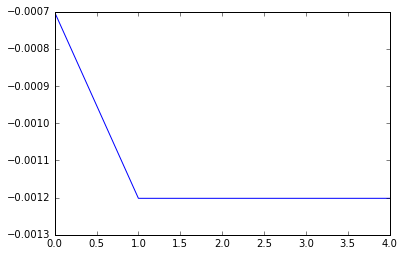

In [13]:
valdf[:5]['Mean'].plot()

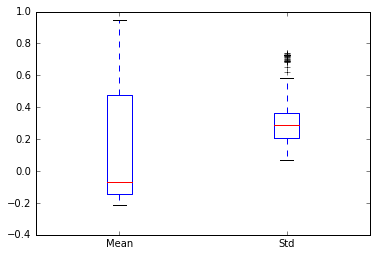

In [14]:
ardf[['Mean','Std']].plot.box()

In [15]:
ardf.describe()

,Time,Mean,Std
count,510.000000,510.000000,510.000000
mean,254.500000,0.202590,0.327203
std,147.368586,0.407260,0.165784
min,0.000000,-0.214064,0.071569
25%,127.250000,-0.146652,0.208894
50%,254.500000,-0.068170,0.288724
75%,381.750000,0.474660,0.365840
max,509.000000,0.945342,0.742871


In [16]:
oriardf = DataFrame(origamiArousal)
orivaldf = DataFrame(origamiValence)
oriardf[0:5]

,Time,Mean,Std
0,0,-0.000068,0.001212
1,1,-0.000568,0.001212
2,2,-0.000568,0.001212
3,3,-0.000568,0.001212
4,4,-0.000568,0.001212


In [17]:
print "Arousal: ", len(ardf) ,"Valence: ", len(valdf)

Arousal:  510 Valence:  511


In [18]:
print "Arousal: ", len(oriardf) ,"Valence: ", len(orivaldf)

Arousal:  501 Valence:  501


with open(os.path.join(pathlist,"listtime")) as f:
    shotframelist = map(lambda x:int(x.replace(',','')), f)

valcuts=valdf[valdf['Time'].isin(shotframelist)]
arcuts=ardf[ ardf['Time'].isin(shotframelist) ]

minin = min(len(valdf),len(ardf))-1
mincuts= min(len(valcuts),len(arcuts))-1

In [19]:
def plot3Df(valdf,ardf,col='r'):
    minin = min(len(valdf),len(ardf))-1
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    #plt.subplot(111,projection='3d')
    ax.scatter(valdf.Mean[0:minin],ardf.Mean[0:minin],valdf.Time[0:minin],c=col,marker='o')
    ax.set_xlabel("valence")
    ax.set_ylabel("arousal")
    ax.set_zlabel("time")
    ax.set_zlim([0,510])
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    plt.title("Time vs Arousal & Valence Mean")
    plt.show()
    
def plotDf(df1Time,df1feat,df2Time,df2feat):
    plt.figure(figsize=(10,10))
    plt.scatter(df1Time,df1feat,color='r')
    plt.scatter(df2Time,df2feat,color='g')
    plt.title("Time vs Arousal & Valence Mean")
    plt.xlim([-10,600])
    plt.xlabel("time(sec)")
    plt.ylabel("mean value")
    plt.show()

def plotValenceArousal(valdf,ardf,col='r'):
    minin = min(len(valdf),len(ardf))-1
    plt.figure(figsize=(10,10))
    #plt.subplot(111,projection='polar')
    plt.scatter(valdf.Mean[0:minin],ardf.Mean[0:minin],color=col)
    plt.title("Valence vs Arousal")
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel("valence")
    plt.ylabel("arousal")
    plt.show()

def plotValenceArousalStd(valdf,ardf,col='r'):
    minin = min(len(valdf),len(ardf))-1
    plt.figure(figsize=(10,10))
    #plt.subplot(111,projection='polar')
    plt.scatter(valdf.Std[0:minin],ardf.Std[0:minin],color=col)
    plt.title("Valence vs Arousal")
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel("valence")
    plt.ylabel("arousal")
    plt.show()


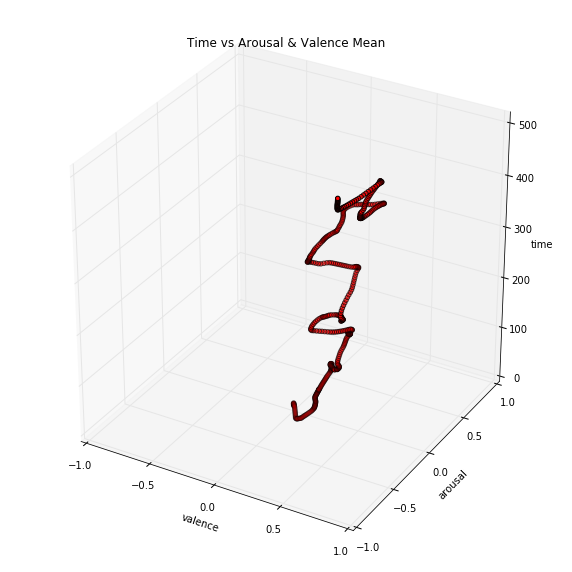

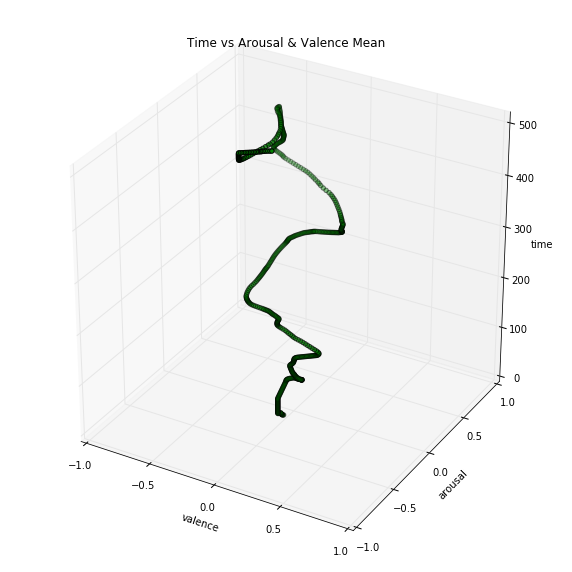

In [20]:
plot3Df(orivaldf,oriardf)
plot3Df(valdf,ardf,'g')


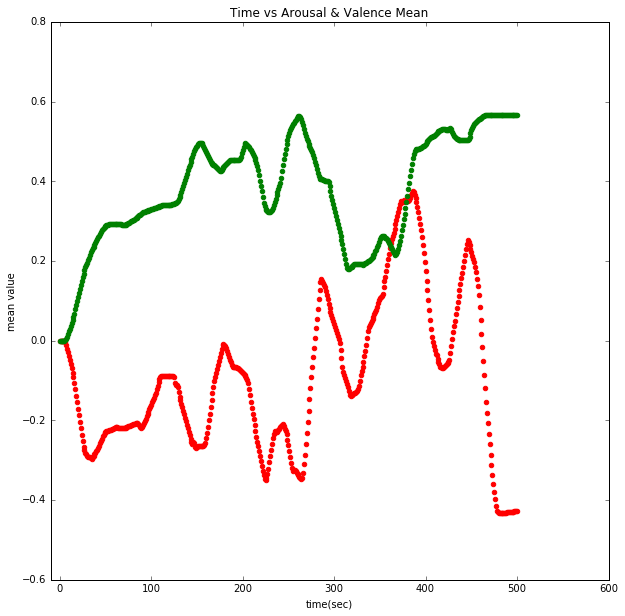

In [21]:
plotDf(oriardf.Time,oriardf.Mean,orivaldf.Time,orivaldf.Mean)

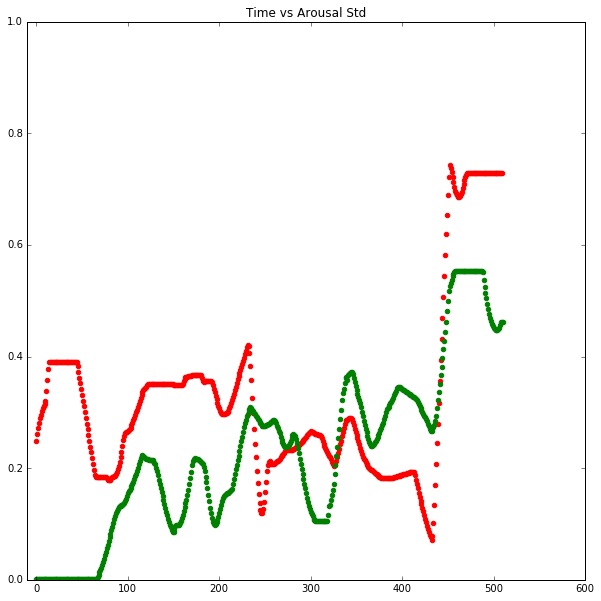

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(ardf.Time,ardf.Std,color='r')
plt.scatter(valdf.Time,valdf.Std,color='g')
plt.ylim([0,1])
plt.xlim([-10,600])
plt.title("Time vs Arousal Std")
plt.show()

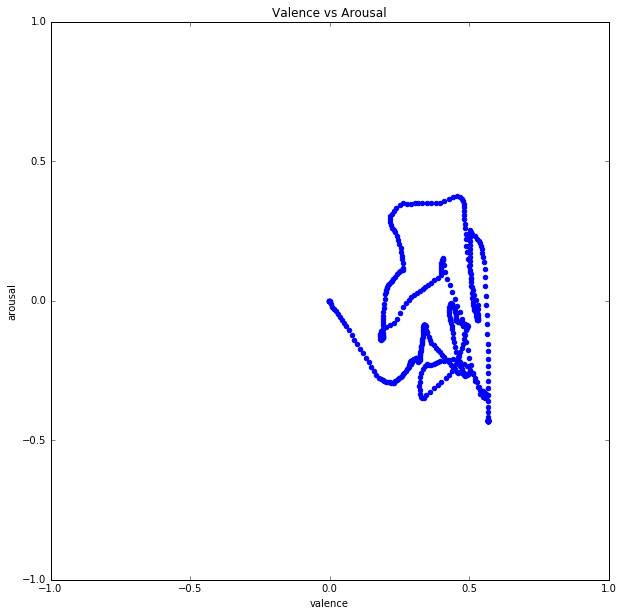

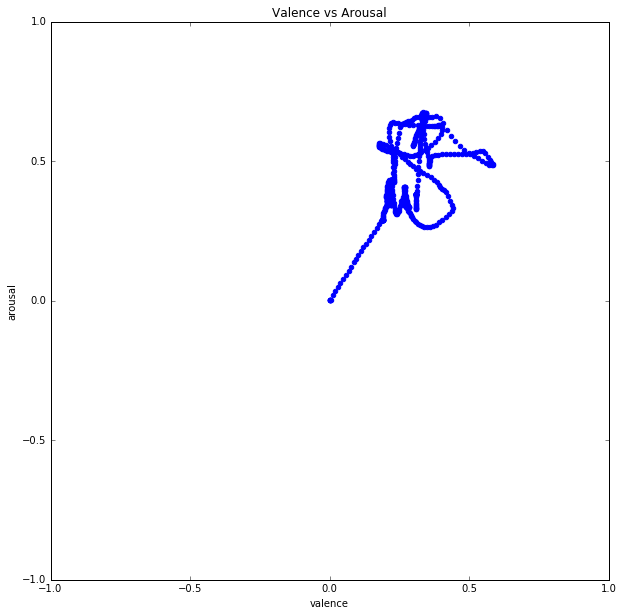

In [23]:
plotValenceArousal(orivaldf,oriardf,'b')
plotValenceArousalStd(orivaldf,oriardf,'b')

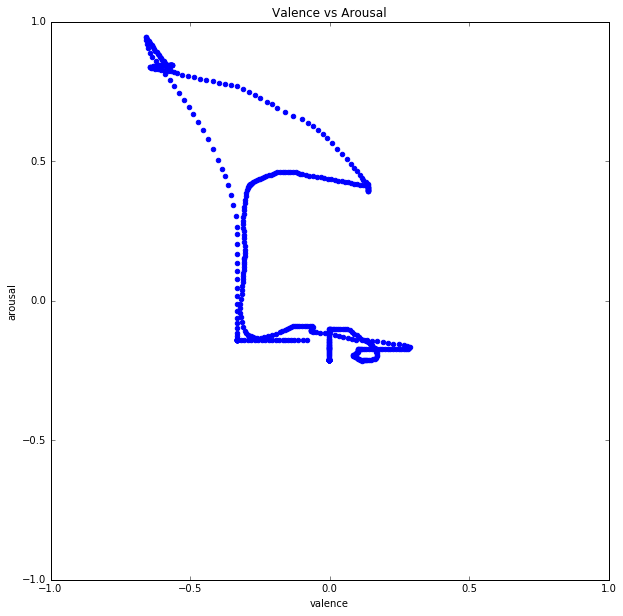

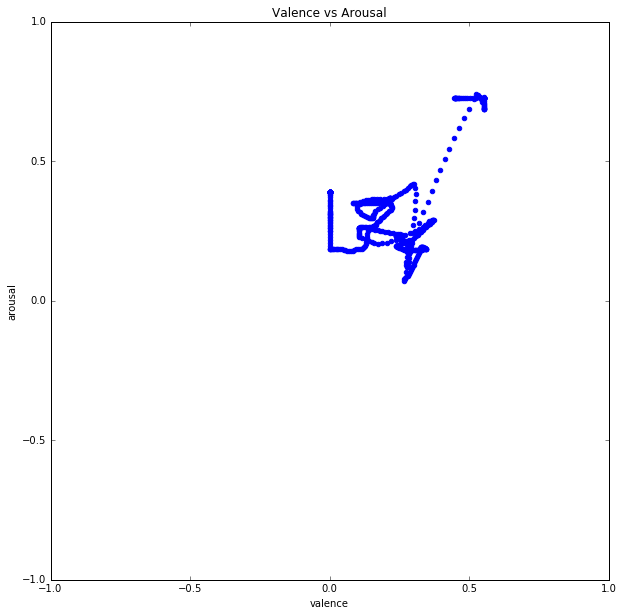

In [24]:
plotValenceArousal(valdf, ardf,'b')
plotValenceArousalStd(valdf, ardf,'b')

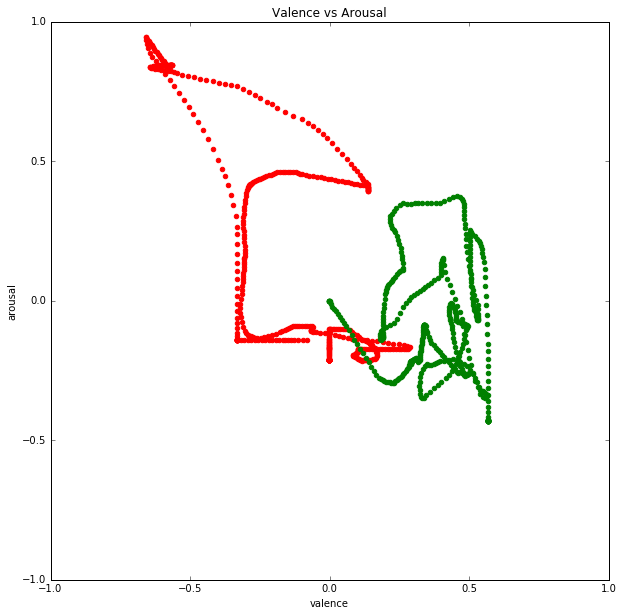

In [39]:

minin = min(len(valdf),len(ardf))-1
mino = min(len(orivaldf),len(orivaldf))-1
plt.figure(figsize=(10,10))
#plt.subplot(111,projection='polar')
plt.scatter(valdf.Mean[0:minin],ardf.Mean[0:minin],color='r')
plt.scatter(orivaldf.Mean[0:mino],oriardf.Mean[0:mino],color='g')
plt.title("Valence vs Arousal")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel("valence")
plt.ylabel("arousal")
plt.show()

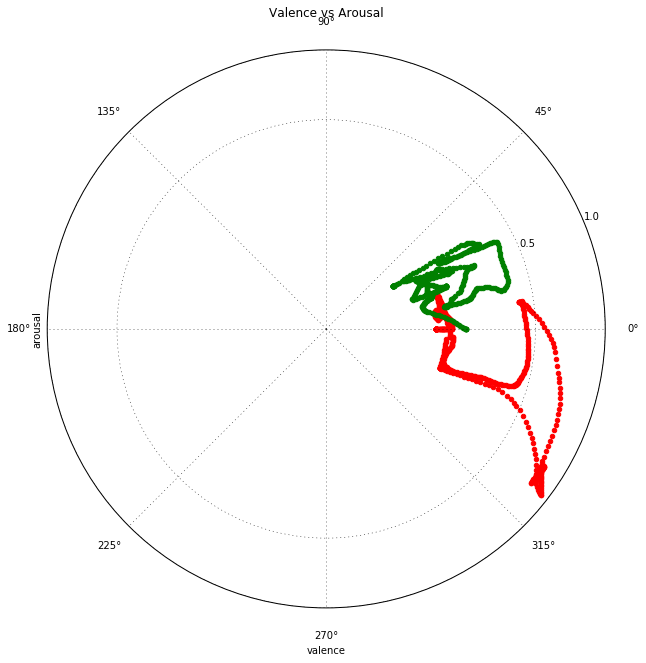

In [40]:
minin = min(len(valdf),len(ardf))-1
mino = min(len(orivaldf),len(orivaldf))-1
plt.figure(figsize=(10,10))
plt.subplot(111,projection='polar')
plt.scatter(valdf.Mean[0:minin],ardf.Mean[0:minin],color='r')
plt.scatter(orivaldf.Mean[0:mino],oriardf.Mean[0:mino],color='g')
plt.title("Valence vs Arousal")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel("valence")
plt.ylabel("arousal")
plt.show()

In [41]:
shottime=shotframelist

NameError: name 'shotframelist' is not defined

In [42]:
import math
shottime = np.sort(shottime)
shottime = shottime//24.0
shottime
a = array([   0.,    0.,    1.,    1.,    1.,    1.,    9.,   11.,   30.,
         30.,   43.,   46.,   50.,   53.,   67.,   69.,   99.,  102.,
        102.,  103.,  111.,  112.,  119.,  125.,  129.,  132.,  137.,
        141.,  143.,  146.,  148.,  150.,  150.,  151.,  153.,  154.,
        161.,  163.,  165.,  188.,  197.,  202.,  206.,  210.,  211.,
        211.,  214.,  218.,  220.,  223.,  228.,  234.,  236.,  239.,
        241.,  245.,  247.,  252.,  254.,  258.,  260.,  263.,  264.,
        267.,  272.,  274.,  275.,  277.,  280.,  283.,  285.,  288.,
        292.,  298.,  301.,  309.,  313.,  321.,  323.,  334.,  336.,
        345.,  347.,  347.,  348.,  353.,  355.,  367.,  372.,  377.,
        382.,  387.,  391.,  400.,  408.,  410.,  411.,  414.,  420.,
        424.,  426.,  429.,  431.,  434.,  472.,  472.,  473.,  473.,
        473.,  474.,  474.,  474.,  475.,  475.,  476.,  482.,  483.,
        483.,  483.,  484.,  484.,  491.,  494.,  509.])

NameError: name 'shottime' is not defined

NameError: name 'valcuts' is not defined

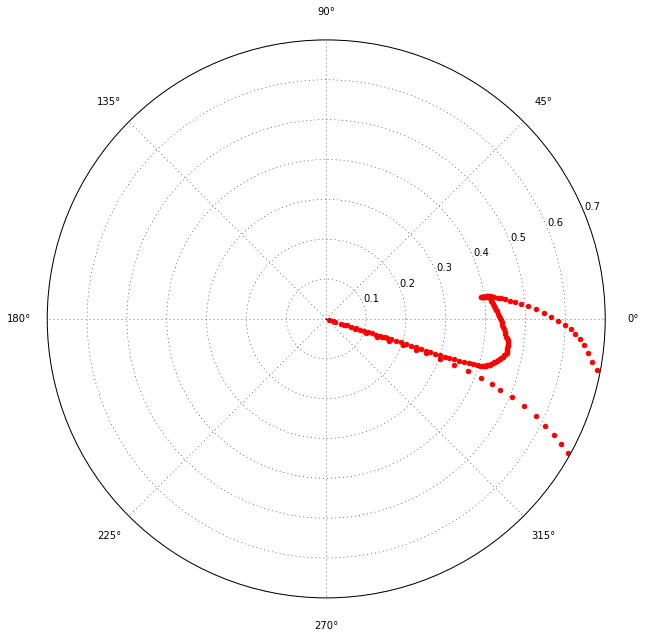

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(111,projection='polar')
plt.scatter(valdf.Mean[0:minin],ardf.Mean[0:minin],color='r')
plt.scatter(valcuts.Mean[0:mincuts],arcuts.Mean[0:mincuts],color='g')
plt.title("Valence vs Arousal")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel("valence")
plt.ylabel("arousal")
plt.show()

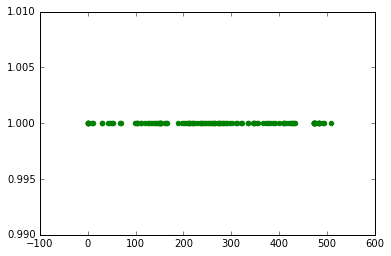

In [28]:
plt.scatter(shottime,np.ones(len(shottime)),color='g')

In [44]:
def plotwhist(x,y,N):
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    # the random data
    #x = np.random.randn(1000)
    #y = np.random.randn(1000)
    #x = valdf.Mean[0:minin]
    #y = ardf.Mean[0:minin]
    x= x[:N]
    y= y[:N]


    fig, axScatter = plt.subplots(figsize=(10, 10))

    # the scatter plot:
    axScatter.scatter(x, y)
    axScatter.set_aspect(1.)

    # create new axes on the right and on the top of the current axes
    # The first argument of the new_vertical(new_horizontal) method is
    # the height (width) of the axes to be created in inches.
    divider = make_axes_locatable(axScatter)
    axHistx = divider.append_axes("top", 1.8, pad=0.1, sharex=axScatter)
    axHisty = divider.append_axes("right", 1.8, pad=0.1, sharey=axScatter)

    # make some labels invisible
    plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
             visible=False)

    # now determine nice limits by hand:
    binwidth = 0.05
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1)*binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x, bins=bins)
    axHisty.hist(y, bins=bins, orientation='horizontal')

    # the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
    # thus there is no need to manually adjust the xlim and ylim of these
    # axis.

    #axHistx.axis["bottom"].major_ticklabels.set_visible(False)
    for tl in axHistx.get_xticklabels():
        tl.set_visible(False)
    #axHistx.set_yticks([0, 50, 100])

    #axHisty.axis["left"].major_ticklabels.set_visible(False)
    for tl in axHisty.get_yticklabels():
        tl.set_visible(False)
    #axHisty.set_xticks([0, 50, 100])

    plt.draw()
    plt.show()


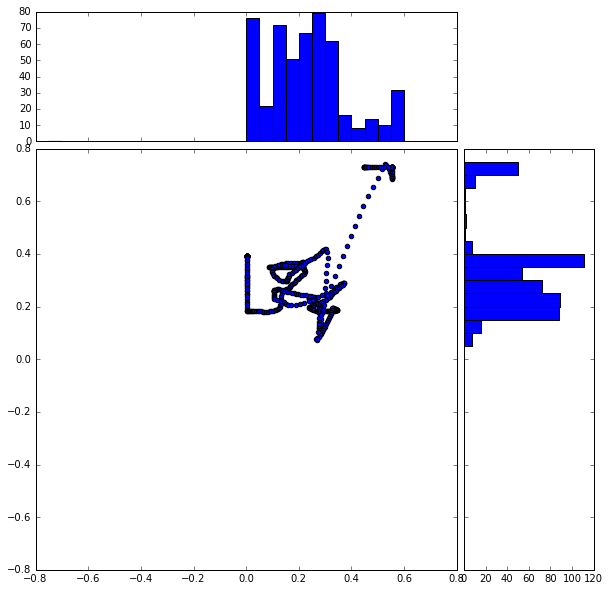

In [30]:
plotwhist(valdf.Std,ardf.Std,minin)